# Model analysis

In [1]:
from graph_pes.models import load_model

model = load_model("graph-pes-results/quickstart-run/model.pt")
model

PaiNN(
  (z_embedding): PerElementEmbedding(
    dim=32,
    elements=['H', 'C', 'N', 'O', 'S']
  )
  (interactions): UniformModuleList(
    (0-2): 3 x Interaction(
      (filter_generator): HaddamardProduct(
        (components): ModuleList(
          (0): Sequential(
            (0): Bessel(n_features=20, cutoff=3.0, trainable=True)
            (1): Linear(in_features=20, out_features=96, bias=True)
          )
          (1): PolynomialEnvelope(cutoff=3.0, p=6)
        )
      )
      (Phi): MLP(32 → 32 → 96, activation=SiLU())
    )
  )
  (updates): UniformModuleList(
    (0-2): 3 x Update(
      (U): VectorLinear(
        (_linear): Linear(in_features=32, out_features=32, bias=False)
      )
      (V): VectorLinear(
        (_linear): Linear(in_features=32, out_features=32, bias=False)
      )
      (mlp): MLP(64 → 32 → 96, activation=SiLU())
    )
  )
  (read_out): MLP(32 → 32 → 1, activation=SiLU())
)

In [2]:
assert model.cutoff is not None
cutoff = float(model.cutoff)
type(model), cutoff

(graph_pes.models.painn.PaiNN, 3.0)

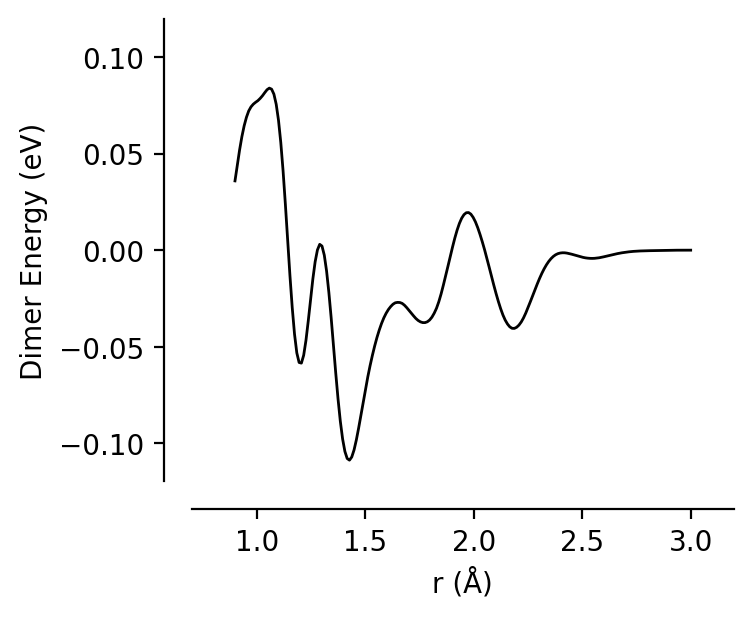

In [3]:
from graph_pes.analysis import dimer_curve

%config InlineBackend.figure_format = 'retina'

dimer_curve(model, system="CH", rmax=cutoff, units="eV");

Finally, we can load in the dataset on which we previously trained the model, and generate a parity plot of the model's predictions for per-atom energies:

In [4]:
from graph_pes.data import load_atoms_dataset

dataset = load_atoms_dataset(
    "QM7",
    cutoff=cutoff,
    n_train=1_000,
    n_valid=100,
)
dataset

Output()

FittingData(
  train=ASEDataset(1,000, labels=['energy']),
  valid=ASEDataset(100, labels=['energy'])
)

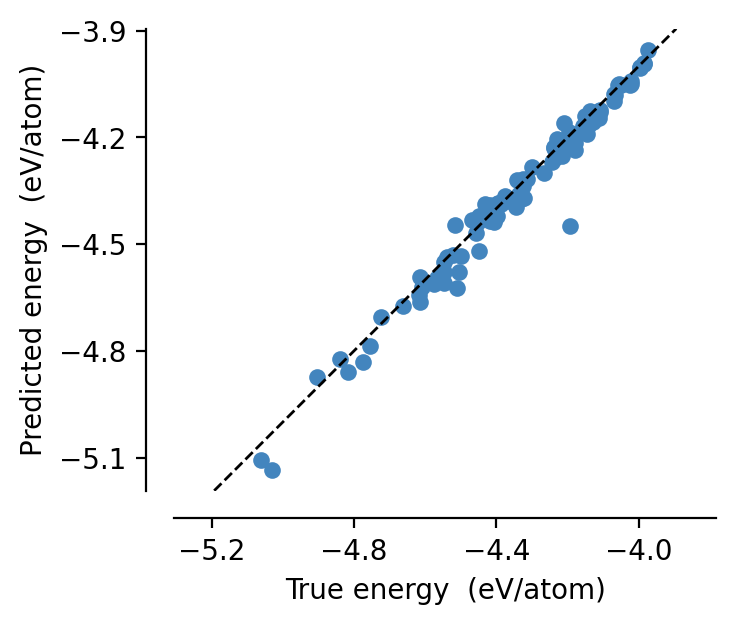

In [5]:
from graph_pes.analysis import parity_plot
from graph_pes.transform import divide_per_atom

parity_plot(
    model,
    list(dataset.valid),
    property="energy",
    transform=divide_per_atom,
    units="eV/atom"
)